In [30]:
from google.colab import files
uploaded=files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
dataset=pd.read_csv("netflix_titles.csv")
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [33]:
dataset.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [34]:
# Find out how many Movies and TV Shows are there.
dataset['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [35]:
# checking missing values
dataset.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [36]:
# replace missing values with mode
mode_value = dataset['rating'].mode()[0]
dataset['rating'].fillna(mode_value, inplace=True)

<ipython-input-36-1755309176>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['rating'].fillna(mode_value, inplace=True)


In [37]:
# replace missing value with Constant Value
dataset['director'].fillna("Unknown", inplace=True)

<ipython-input-37-2917235144>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['director'].fillna("Unknown", inplace=True)


In [38]:
dataset['cast'].fillna("Unknown", inplace=True)
dataset['country'].fillna(dataset['country'].mode()[0], inplace=True)
dataset['date_added'].fillna(dataset['date_added'].mode()[0], inplace=True)
dataset['duration'].fillna(dataset['duration'].mode()[0],inplace=True)

<ipython-input-38-4132585738>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['cast'].fillna("Unknown", inplace=True)
<ipython-input-38-4132585738>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [39]:
dataset.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [40]:
# find top 10 countries
top_countries = dataset['country'].value_counts().head(10)
top_countries

,count
country,
United States,3649
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


<ipython-input-41-797387876>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='type', palette='Set2')


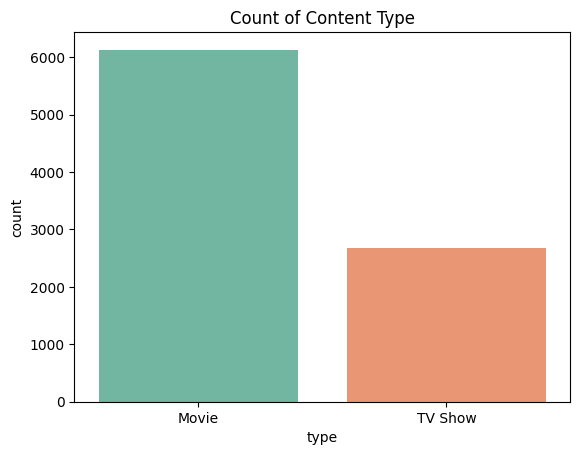

In [41]:
# 1. Univariate Analysis
sns.countplot(data=dataset, x='type', palette='Set2')
plt.title("Count of Content Type")
plt.show()

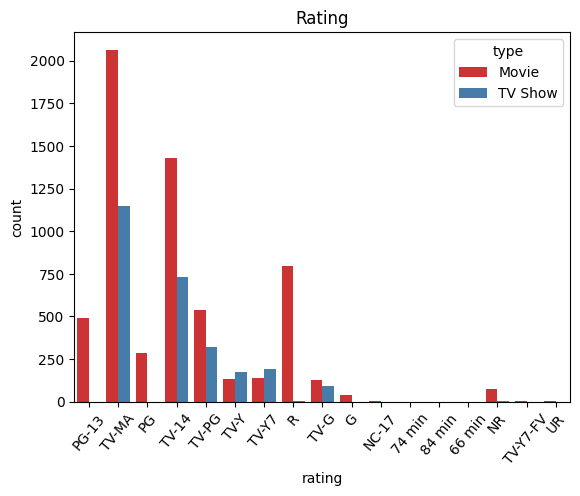

In [42]:
# 2. Bivariate Analysis
sns.countplot(data=dataset, x='rating', hue='type', palette='Set1')
plt.xticks(rotation=50)
plt.title("Rating")
plt.show()


In [43]:
# 3. Trivariate Analysis (3 Variables)
dataset['date_added'] = pd.to_datetime(dataset['date_added'])
dataset['year_added'] = dataset['date_added'].dt.year
sns.scatterplot(data=dataset, x='release_year', y='year_added', hue='type')
plt.title("Release Year vs Year Added")
plt.show()

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
#4. Multivariate Analysis (4+ Variables)
dataset_movies = dataset[(dataset['type'] == 'Movie') & (dataset['duration'].str.contains('min', na=False))].copy()
dataset_movies['duration_minutes'] = dataset_movies['duration'].str.replace(' min', '', regex=False).astype(float)
sns.boxplot(data=dataset_movies, x='rating', y='duration_minutes', palette='Set3')
plt.xticks(rotation=45)
plt.title("Movie Duration")
plt.xlabel("Rating")
plt.ylabel("Duration - min")
plt.show()